In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
# Regression, and prints the model accuracy
from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
x=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
print(accuracy_score(y_test,model.predict(x_test)))

1.0


In [ ]:
#  Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
# and print the model accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use LogisticRegression with L1 penalty and a suitable solver
logistic_regression_model = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression_model.fit(x_train, y_train)

# Predict on the test set and calculate accuracy
print(accuracy_score(y_test, logistic_regression_model.predict(x_test)))

1.0


In [ ]:
# Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
# LogisticRegression(penalty='l2'). Print model accuracy and coefficients
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Use LogisticRegression with L1 penalty and a suitable solver
logistic_regression_model = LogisticRegression(penalty='l2')
logistic_regression_model.fit(x_train, y_train)

# Predict on the test set and calculate accuracy
print(accuracy_score(y_test, logistic_regression_model.predict(x_test)))
print(logistic_regression_model.coef_)


1.0
[[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]


In [ ]:
#  Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use LogisticRegression with Elastic Net penalty and the 'saga' solver
logistic_regression_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
logistic_regression_model.fit(x_train, y_train)

# Predict on the test set and calculate accuracy
print(accuracy_score(y_test, logistic_regression_model.predict(x_test)))
print(logistic_regression_model.coef_)

1.0
[[ 0.51669155  1.77221129 -2.37042084 -0.80756291]
 [ 0.24153328  0.          0.         -0.64290899]
 [-1.30084485 -1.56620489  2.5702326   1.98447731]]


In [ ]:
#  Write a Python program to train a Logistic Regression model for multiclass classification using
# multi_class='ovr'
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (Iris for example)
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train Logistic Regression model (one-vs-rest)
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
#  Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
# Regression. Print the best parameters and accuracy
from sklearn.model_selection import GridSearchCV
params= {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}
c=LogisticRegression()
clf=GridSearchCV(c,params,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)


{'C': 1, 'penalty': 'l2'}
0.9666666666666666


In [ ]:
#  Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
# average accuracy
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv=KFold(n_splits=8)
score=cross_val_score(LogisticRegression(),x,y,cv=cv,scoring='accuracy')
print(score)
print(score.mean())


[1.         1.         1.         0.94736842 0.89473684 0.94736842
 0.88888889 0.88888889]
0.945906432748538


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load dataset from CSV
# Replace 'data.csv' with your actual file path
df = pd.read_csv("data.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Step 2: Separate features (X) and target (y)
# Replace 'target_column' with the actual target column name in your dataset
X = df.drop("target_column", axis=1)
y = df["target_column"]

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Create and train Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
# Logistic Regression. Print the best parameters and accuracy
from sklearn.model_selection import RandomizedSearchCV
params= {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}
c=LogisticRegression()
clf=RandomizedSearchCV(c,params,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)


{'penalty': 'l2', 'C': 2}
0.9583333333333334


In [ ]:
#  Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

X,y=make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=3,random_state=20)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Use OneVsOneClassifier with LogisticRegression as the estimator
model = OneVsOneClassifier(LogisticRegression(solver='liblinear')) # Using liblinear solver for smaller datasets
model.fit(x_train,y_train)

# Print accuracy
print(accuracy_score(y_test, model.predict(x_test)))

0.67


In [ ]:
# Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
# classification
from sklearn.metrics import confusion_matrix
X,y=make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=2,random_state=20)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
print(confusion_matrix(y_test,model.predict(x_test)))

[[89 11]
 [13 87]]


In [ ]:
#  Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
# Recall, and F1-Score
print(classification_report(y_test,model.predict(x_test))
)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       100
           1       0.89      0.87      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
# Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
# improve model performance


In [ ]:
# Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
# improve model performance

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate some imbalanced data (example)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with balanced class weights
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict and evaluate
y_pred_balanced = model_balanced.predict(X_test)

print("Model with balanced class weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Model with balanced class weights:
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       184
           1       0.30      0.88      0.45        16

    accuracy                           0.83       200
   macro avg       0.65      0.85      0.68       200
weighted avg       0.93      0.83      0.86       200

Confusion Matrix:
 [[152  32]
 [  2  14]]


In [ ]:
#  Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
# evaluate performance
df=sns.load_dataset('titanic')


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['age'].fillna(df['age'].unique().mean(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df.dropna(inplace=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare'] # Assuming these are numerical

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns as they are
)

# Create a pipeline with preprocessing and Logistic Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
model.fit(X_train, y_train)

# You can now make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
#  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
# model. Evaluate its accuracy and compare results with and without scaling
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns # Import seaborn for loading the dataset

# Step 1: Load Titanic dataset
df = sns.load_dataset('titanic')

# Step 2: Handle missing values
# Correct column names to lowercase
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# Correct column name to lowercase
df.dropna(subset=['survived'], inplace=True)

# Step 3: Encode categorical variables
# Correct column names to lowercase
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])
df['embarked'] = label_enc.fit_transform(df['embarked'])

# Step 4: Select features and target
# Correct column names to lowercase
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived'] # Correct column name to lowercase

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Without Scaling ----
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# ---- With Standardization ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaling = LogisticRegression(max_iter=200)
model_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = model_scaling.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, y_pred_scaling)

# ---- Results ----
print(f"Accuracy without scaling: {acc_no_scaling:.4f}")
print(f"Accuracy with scaling:    {acc_scaling:.4f}")

Accuracy without scaling: 0.8101
Accuracy with scaling:    0.8045


In [ ]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load dataset
df =  sns.load_dataset('titanic')
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.8808236808236808


In [ ]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
# accuracy
model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.7988826815642458


In [ ]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model
# coefficients
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


    Feature  Coefficient
6  embarked     0.222565
5      fare     0.002862
2       age    -0.031162
4     parch    -0.100614
3     sibsp    -0.302837
0    pclass    -0.958122
1       sex    -2.581480


In [ ]:
# 19.  Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
# Score
from sklearn.metrics import cohen_kappa_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen’s Kappa Score: 0.5819927348209653


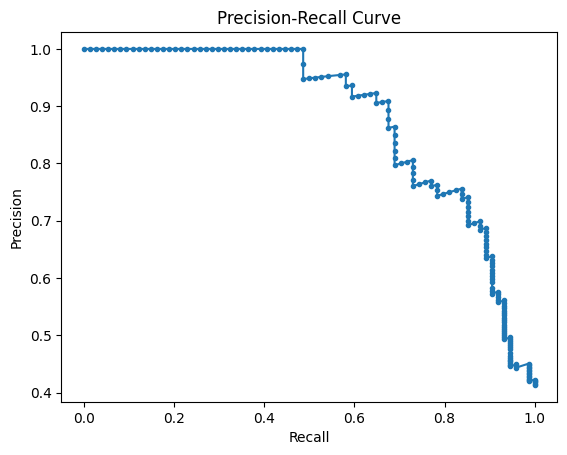

In [ ]:
#20.  Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
# classificatio.
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
# 21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
# their accuracy
solvers = ['liblinear', 'saga', 'lbfgs']

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {solver} solver: {accuracy}")

Accuracy with liblinear solver: 0.7821229050279329
Accuracy with saga solver: 0.6703910614525139
Accuracy with lbfgs solver: 0.7988826815642458


In [ ]:
# 22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews
# Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MCC:", matthews_corrcoef(y_test, y_pred))


MCC: 0.582621478362547


In [ ]:
# 23.Write a Python program to train Logistic Regression and evaluate its performance using Matthews
# Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MCC:", matthews_corrcoef(y_test, y_pred))


MCC: 0.582621478362547


In [ ]:
# 24.Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
# accuracy to see the impact of feature scaling
from sklearn.preprocessing import StandardScaler

# Without scaling
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = model_scaled.score(X_test_scaled, y_test)

print(f"Accuracy (Raw): {acc_raw:.4f}")
print(f"Accuracy (Scaled): {acc_scaled:.4f}")


Accuracy (Raw): 0.7989
Accuracy (Scaled): 0.7989


In [ ]:
# 25. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
# cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_['C'])
print("Best Score:", grid.best_score_)


Best C: 0.1
Best Score: 0.8005121638924455


In [ ]:
# 26. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
# make predictions.
import joblib

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "logistic_model.pkl")

# Load model
loaded_model = joblib.load("logistic_model.pkl")
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Accuracy: 0.7988826815642458
